# Irregular ABP Waveforms
### Author: Stephen Peterkins

In [2]:
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

In [3]:
output_notebook()

Loading BokehJS ...

In [8]:
storeA=pd.HDFStore('ABP_A.hd5')
storeB=pd.HDFStore('ABP_B.hd5')
storeC=pd.HDFStore('ABP_C.hd5')

wavesA=storeA.select('Waveforms')
wavesB=storeB.select('Waveforms')
wavesC=storeC.select('Waveforms')

wavesA.head(5)

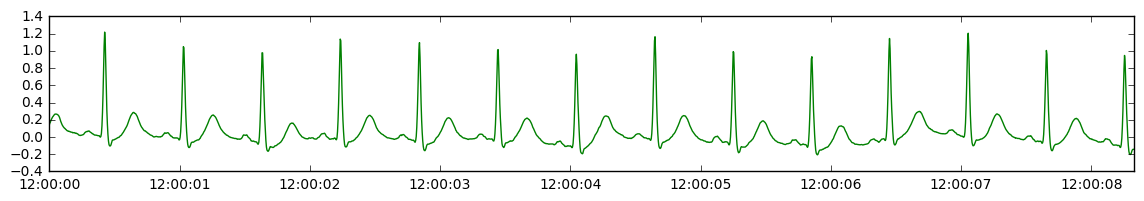

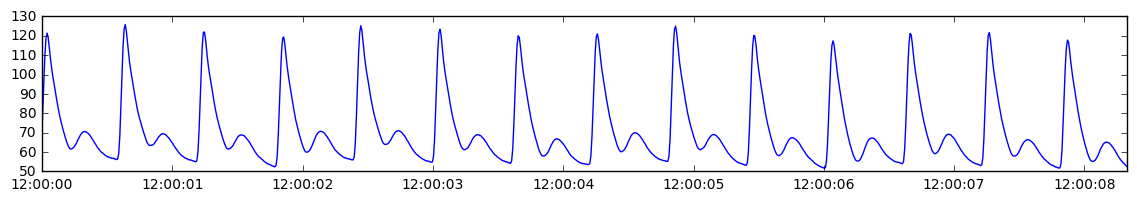

In [5]:
waveform_data = wavesA.head(2000)
ecg_a_signal = waveform_data['III']
abp_a_signal = waveform_data['AR1']

plt.figure(num=1, figsize=(14, 2))
plt.plot(ecg_a_signal, color='green')
plt.figure(num=2, figsize=(14, 2))
plt.plot(abp_a_signal, color='blue')

plt.show()

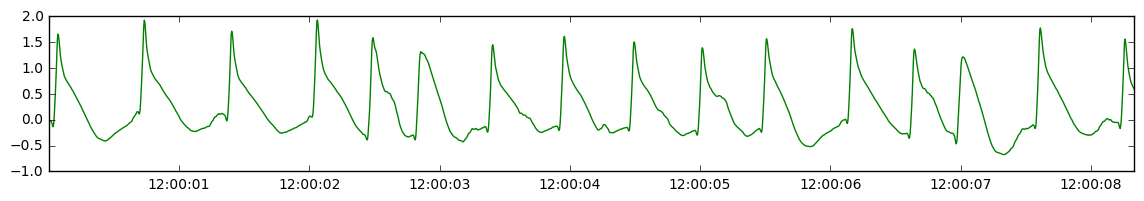

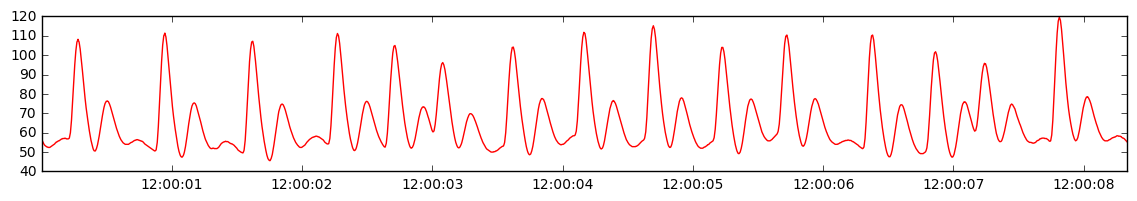

In [6]:
waveform_data = wavesB.head(2000)
ecg_b_signal = waveform_data['III']
abp_b_signal = waveform_data['AR1']

plt.figure(num=3, figsize=(14, 2))
plt.plot(ecg_b_signal, color='green')
plt.figure(num=4, figsize=(14, 2))
plt.plot(abp_b_signal, color='red')

plt.show()

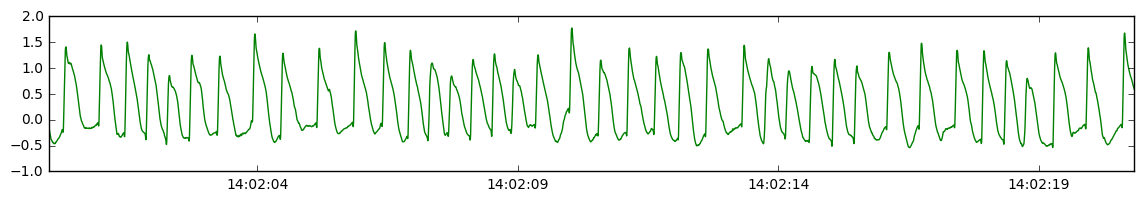

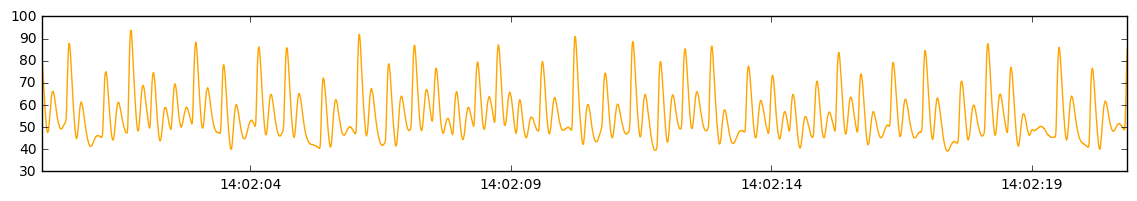

In [7]:
waveform_data = wavesC.head(5000)
ecg_c_signal = waveform_data['III']
abp_c_signal = waveform_data['AR1']

plt.figure(num=3, figsize=(14, 2))
plt.plot(ecg_c_signal, color='green')
plt.figure(num=4, figsize=(14, 2))
plt.plot(abp_c_signal, color='orange')

plt.show()

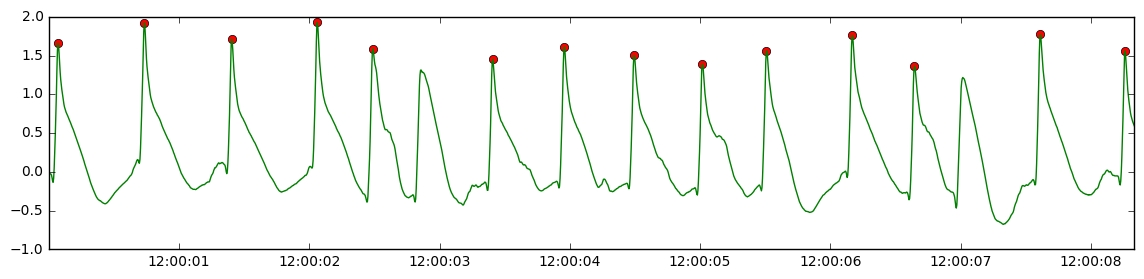

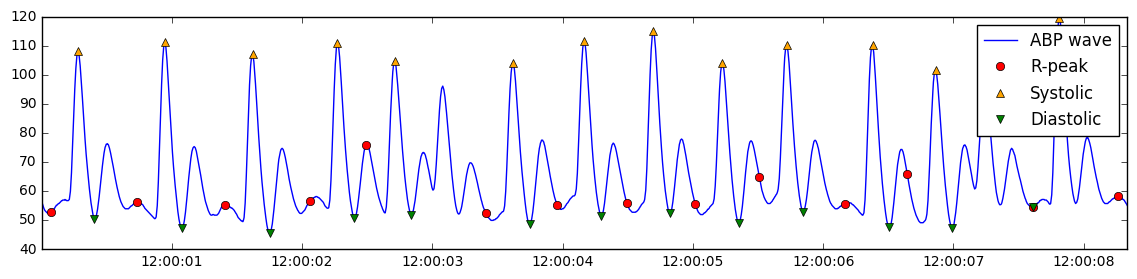

In [19]:
seg_waves = ecg.christov_segmenter(signal=ecg_b_signal.values, sampling_rate=240.)
R_peaks = np.array(seg_waves).tolist()[0]
systolic = [] #max
diastolic = [] #min

ABP_waves = []
ABP_waves_len = []

for i in range(0,len(R_peaks)-1):
    abp_seg = abp_b_signal[list(range(R_peaks[i],R_peaks[i+1]))]
    
    abp_max = abp_seg.index.get_loc(abp_seg[abp_seg == abp_seg.max()].index[0])
    abp_min = abp_seg.index.get_loc(abp_seg[abp_seg == abp_seg.min()].index[0])
    
    ABP_waves.append(abp_seg)
    
    if systolic == []:
        systolic.append(abp_max + R_peaks[0])
        diastolic.append(abp_min + R_peaks[0])
    else:
        wave_int = sum(ABP_waves_len) + R_peaks[0]
        systolic.append(wave_int + abp_max)
        diastolic.append(wave_int + abp_min)

    ABP_waves_len.append(len(abp_seg))
    
plt.figure(num=3, figsize=(14, 3))
plt.plot(ecg_b_signal[R_peaks], 'o', color='red')
plt.plot(ecg_b_signal, color='green')
plt.figure(num=4, figsize=(14, 3))
plt.plot(abp_b_signal, color='blue', label='ABP wave')
plt.plot(abp_b_signal[R_peaks], 'o', color='red', label='R-peak')
plt.plot(abp_b_signal[systolic], '^', color='orange', label='Systolic')
plt.plot(abp_b_signal[diastolic], 'v', color='green', label='Diastolic')
plt.legend(numpoints=1)
plt.show()

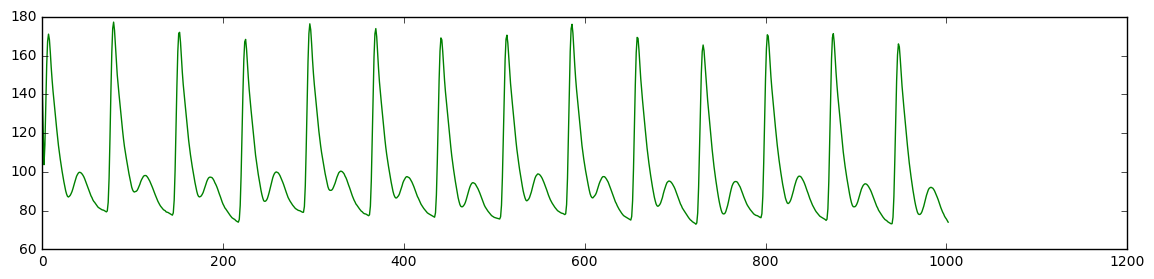

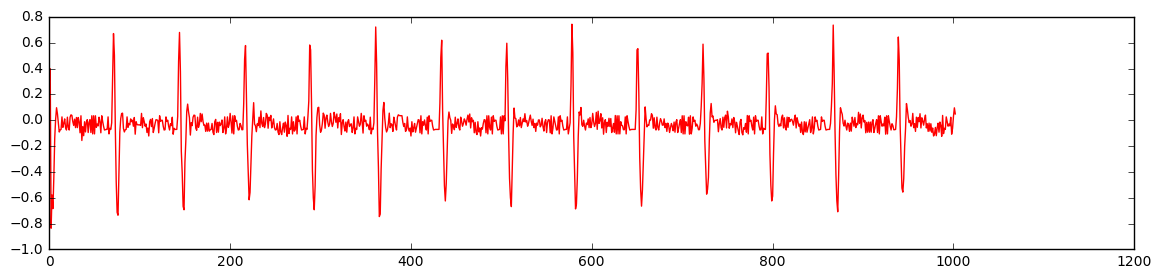

In [20]:
# Too much noise, need multilevel
cA, cD = pywt.dwt(abp_a_signal, 'db4')

plt.figure(num=5, figsize=(14, 3))
plt.plot(cA, color='green', label='cA')

plt.figure(num=6, figsize=(14, 3))
plt.plot(cD, color='red', label='cD')

plt.show()

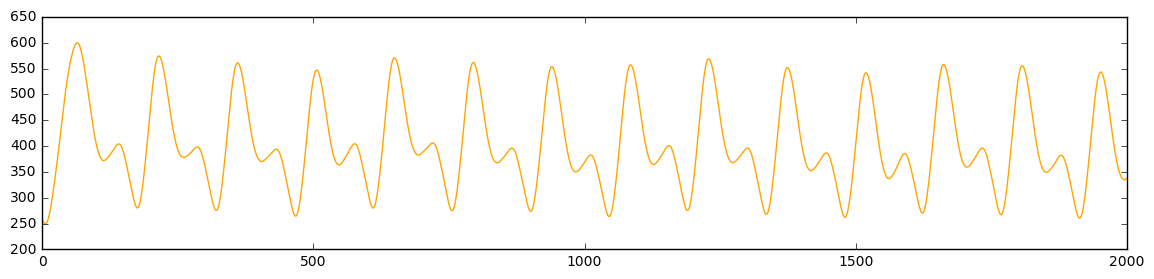

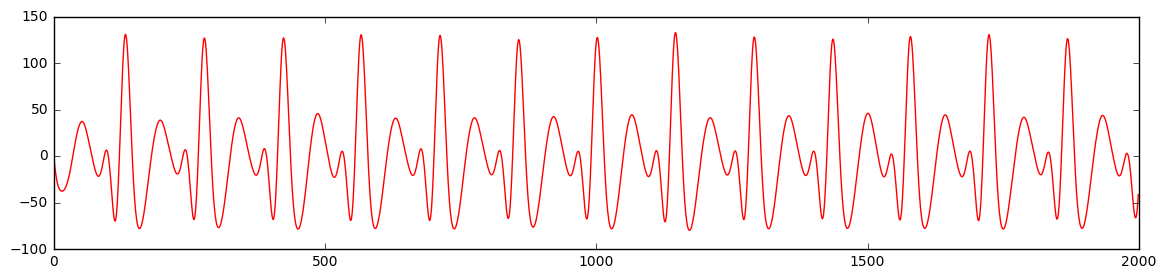

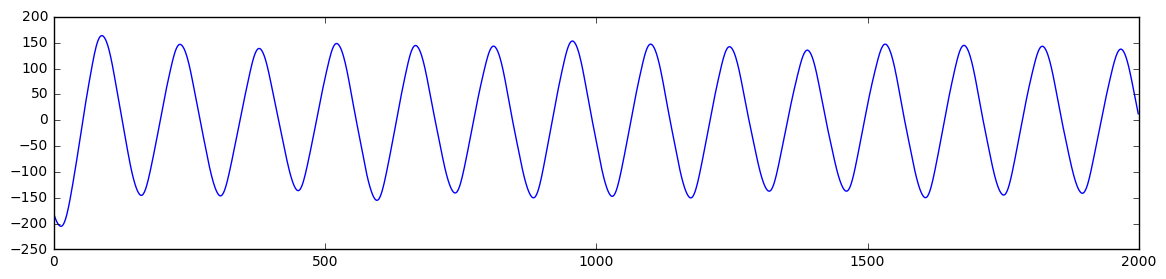

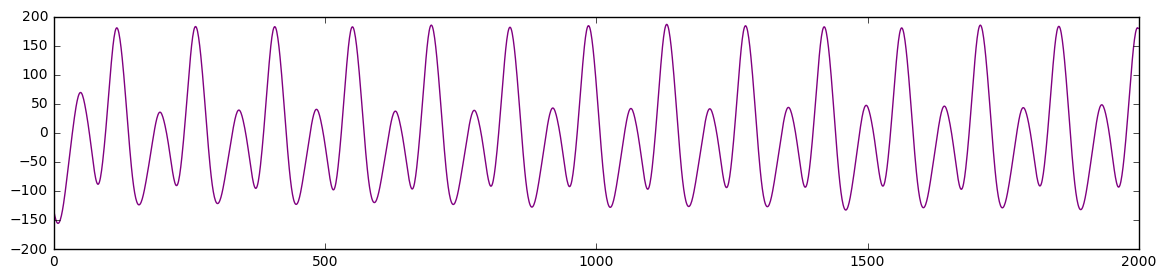

In [23]:
#15000
abp_a_signal_swt = wavesA.head(3200)['AR1']

db4 = pywt.Wavelet('db4')

(cA7a, cD7a), (cA6a, cD6a), (cA5a, cD5a), (cA4a, cD4a), (cA3a, cD3a), (cA2a, cD2a), (cA1a, cD1a) = pywt.swt(abp_a_signal_swt, db4, level=7)

plt.figure(num=9, figsize=(14, 3))
plt.plot(cA5a[:2000], color='orange', label='cA5')

plt.figure(num=10, figsize=(14, 3))
plt.plot(cD5a[:2000], color='red', label='cD5')

plt.figure(num=11, figsize=(14, 3))
plt.plot(cD7a[:2000], color='blue', label='cA4')

plt.figure(num=12, figsize=(14, 3))
plt.plot(cD6a[:2000], color='purple', label='cD4')

plt.show()

In [20]:
abp_a_signal_swt = wavesA.head(3200)['AR1']

db4 = pywt.Wavelet('db4')

len(pywt.swt(abp_a_signal_swt, db4, level=7))

7

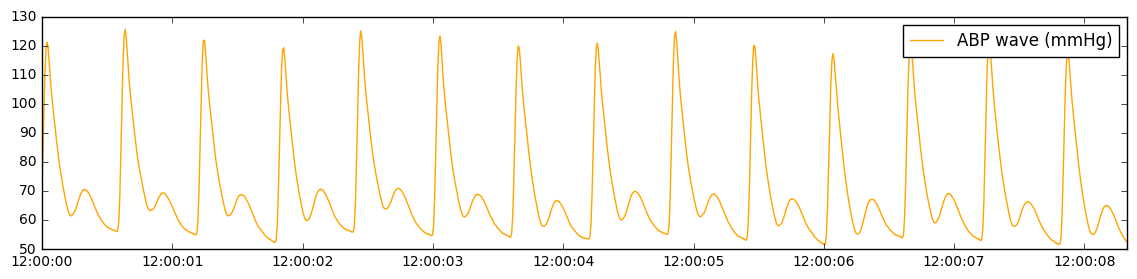

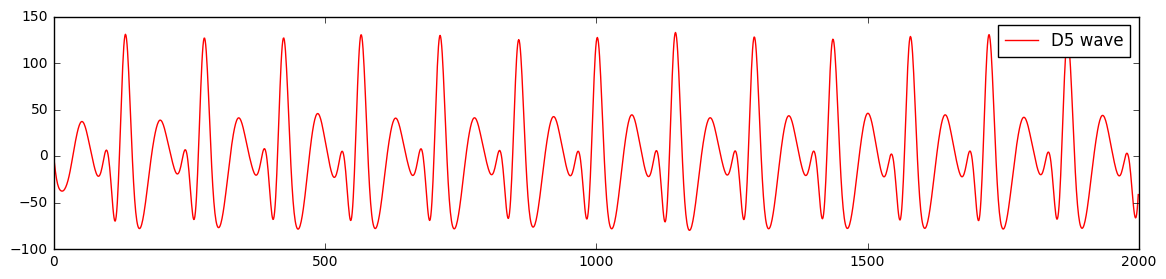

In [12]:
plt.figure(num=9, figsize=(14, 3))
plt.plot(abp_a_signal_swt.head(2000), color='orange', label='ABP wave (mmHg)')
plt.legend(numpoints=1)

plt.figure(num=10, figsize=(14, 3))
plt.plot(cD5a[:2000], color='red', label='D5 wave')
plt.legend(numpoints=1)

plt.show()

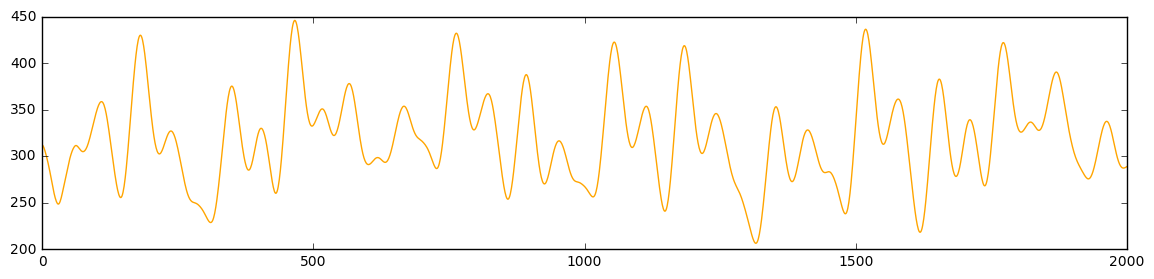

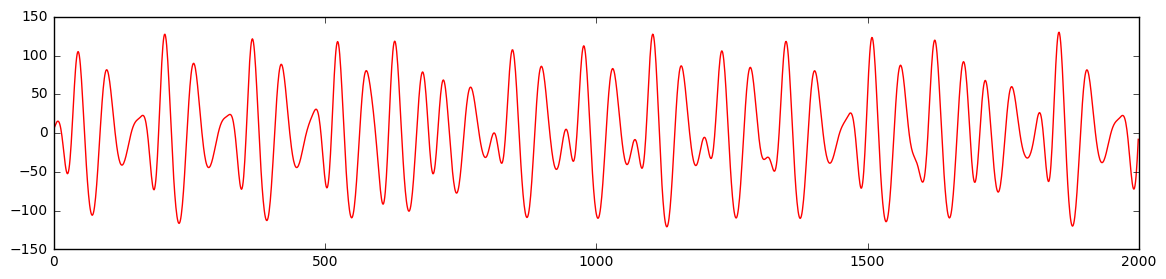

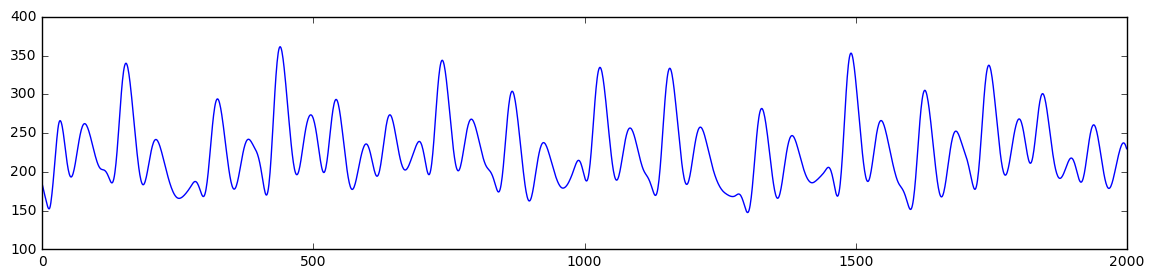

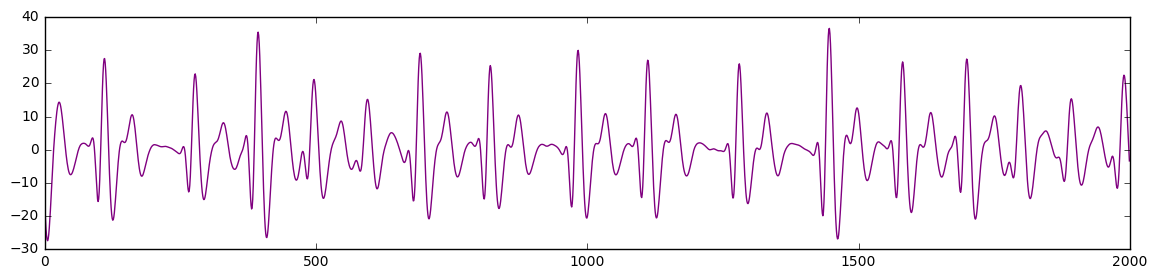

In [42]:
#15000
abp_b_signal_swt = wavesB.head(3200)['AR1']

db4 = pywt.Wavelet('db4')

(cA5b, cD5b), (cA4b, cD4b), (cA3b, cD3b), (cA2b, cD2b), (cA1b, cD1b) = pywt.swt(abp_b_signal_swt, db4, level=5)

plt.figure(num=9, figsize=(14, 3))
plt.plot(cA5[:2000], color='orange', label='cA5')

plt.figure(num=10, figsize=(14, 3))
plt.plot(cD5b[:2000], color='red', label='cD5')

plt.figure(num=11, figsize=(14, 3))
plt.plot(cA4[:2000], color='blue', label='cA4')

plt.figure(num=12, figsize=(14, 3))
plt.plot(cD4[:2000], color='purple', label='cD4')

plt.show()

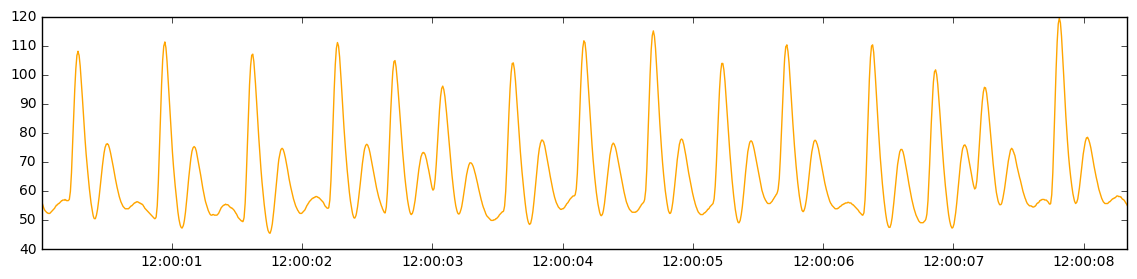

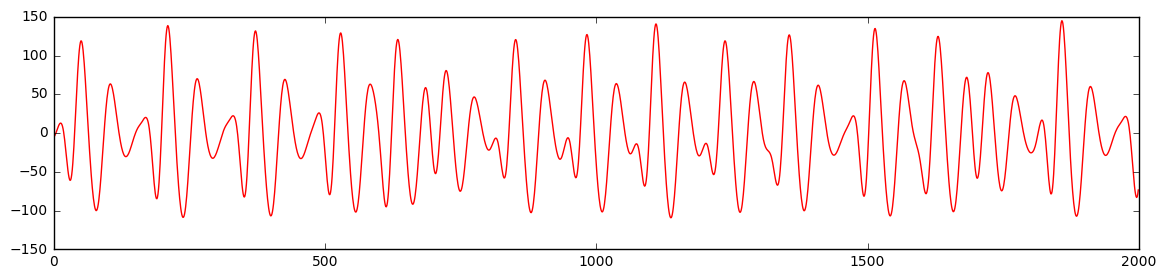

In [24]:
plt.figure(num=9, figsize=(14, 3))
plt.plot(abp_b_signal_swt.head(2000), color='orange', label='Original')

plt.figure(num=10, figsize=(14, 3))
plt.plot(cD5b[:2000], color='red', label='cD5')

plt.show()

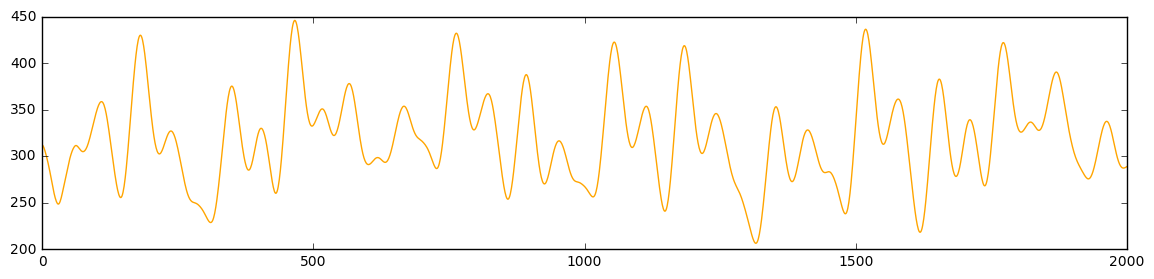

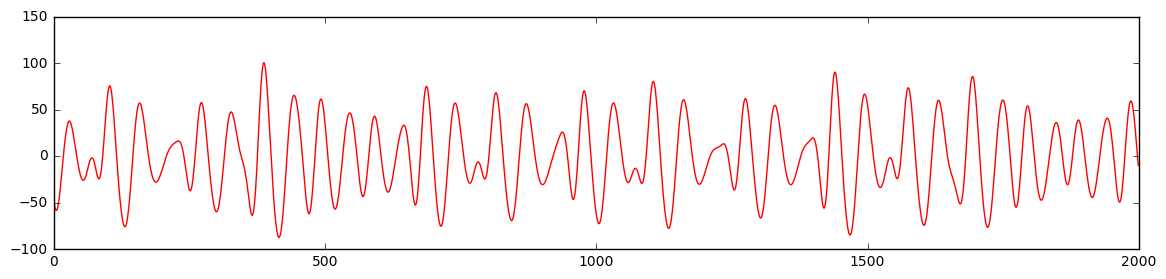

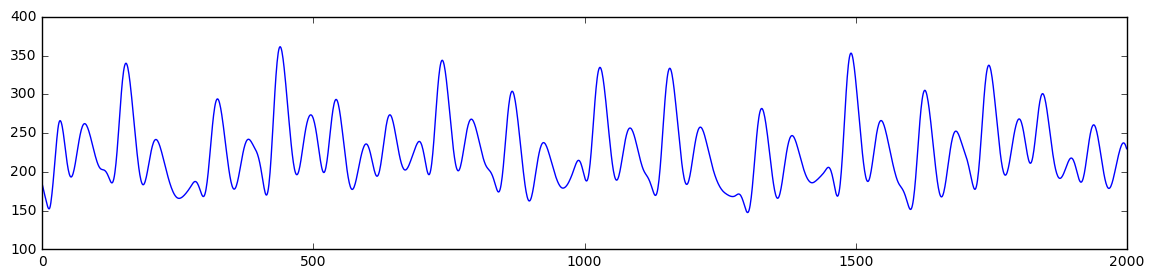

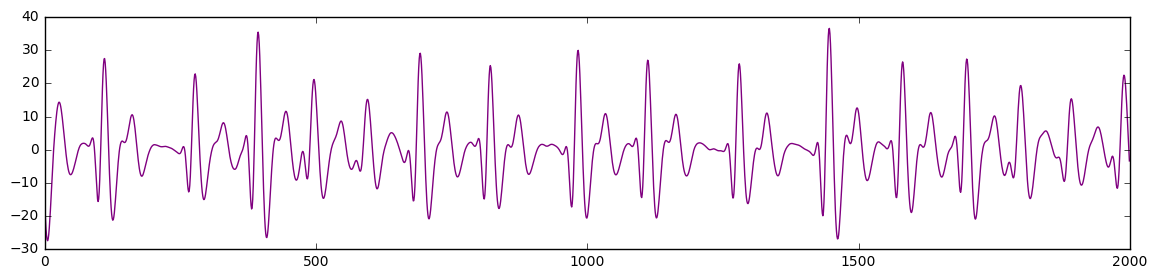

In [44]:
#15000
abp_c_signal_swt = wavesC.head(3200)['AR1']

db4 = pywt.Wavelet('db4')

(cA5c, cD5c), (cA4c, cD4c), (cA3c, cD3c), (cA2c, cD2c), (cA1c, cD1c) = pywt.swt(abp_c_signal_swt, db4, level=5)

plt.figure(num=9, figsize=(14, 3))
plt.plot(cA5[:2000], color='orange', label='cA5')

plt.figure(num=10, figsize=(14, 3))
plt.plot(cD5c[:2000], color='red', label='cD5')

plt.figure(num=11, figsize=(14, 3))
plt.plot(cA4[:2000], color='blue', label='cA4')

plt.figure(num=12, figsize=(14, 3))
plt.plot(cD4[:2000], color='purple', label='cD4')

plt.show()

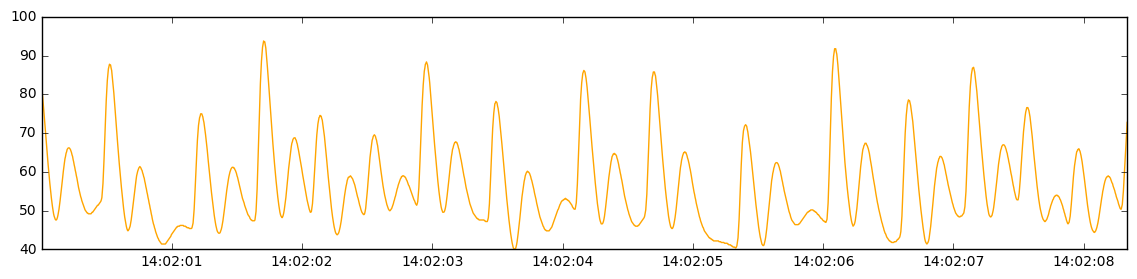

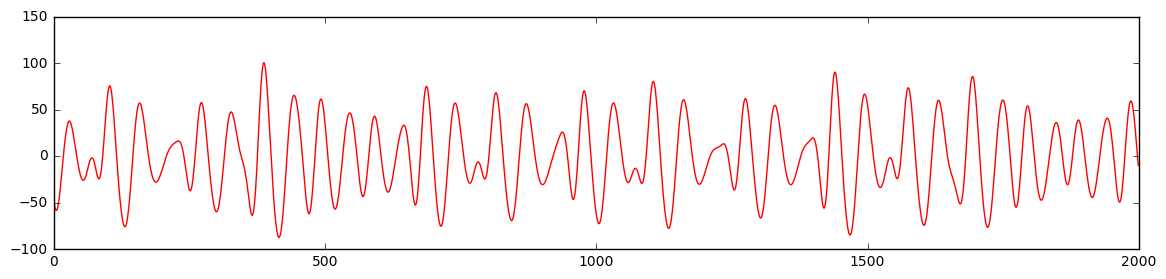

In [26]:
plt.figure(num=9, figsize=(14, 3))
plt.plot(abp_c_signal_swt.head(2000), color='orange', label='Original')

plt.figure(num=10, figsize=(14, 3))
plt.plot(cD5c[:2000], color='red', label='cD5')

plt.show()

In [14]:
energy = {}

def energyCoeffCalc(coeff):
    return np.sqrt(np.sum(np.array(coeff ** 2)) / len(coeff)
                   
energy["type"] = ['a']
energy["D1"] = [np.sqrt(np.sum(np.array(cD1a[:2000]) ** 2)) / len(cD1a[:2000])]
energy["A1"] = [np.sqrt(np.sum(np.array(cA1a[:2000]) ** 2)) / len(cA1a[:2000])]

energy["D2"] = [np.sqrt(np.sum(np.array(cD2a[:2000]) ** 2)) / len(cD2a[:2000])]
energy["A2"] = [np.sqrt(np.sum(np.array(cA2a[:2000]) ** 2)) / len(cA2a[:2000])]

energy["D3"] = [np.sqrt(np.sum(np.array(cD3a[:2000]) ** 2)) / len(cD3a[:2000])]
energy["A3"] = [np.sqrt(np.sum(np.array(cA3a[:2000]) ** 2)) / len(cA3a[:2000])]

energy["D4"] = [np.sqrt(np.sum(np.array(cD4a[:2000]) ** 2)) / len(cD4a[:2000])]
energy["A4"] = [np.sqrt(np.sum(np.array(cA4a[:2000]) ** 2)) / len(cA4a[:2000])]

energy["D5"] = [np.sqrt(np.sum(np.array(cD5a[:2000]) ** 2)) / len(cD5a[:2000])]
energy["A5"] = [np.sqrt(np.sum(np.array(cA5a[:2000]) ** 2)) / len(cD5a[:2000])]


energy["type"].append('b')
energy["D1"].append(np.sqrt(np.sum(np.array(cD1b[:2000]) ** 2)) / len(cD1b[:2000]))
energy["A1"].append(np.sqrt(np.sum(np.array(cA1b[:2000]) ** 2)) / len(cA1b[:2000]))

energy["D2"].append(np.sqrt(np.sum(np.array(cD2b[:2000]) ** 2)) / len(cD2b[:2000]))
energy["A2"].append(np.sqrt(np.sum(np.array(cA2b[:2000]) ** 2)) / len(cA2b[:2000]))

energy["D3"].append(np.sqrt(np.sum(np.array(cD3b[:2000]) ** 2)) / len(cD3b[:2000]))
energy["A3"].append(np.sqrt(np.sum(np.array(cA3b[:2000]) ** 2)) / len(cA3b[:2000]))

energy["D4"].append(np.sqrt(np.sum(np.array(cD4b[:2000]) ** 2)) / len(cD4b[:2000]))
energy["A4"].append(np.sqrt(np.sum(np.array(cA4b[:2000]) ** 2)) / len(cA4b[:2000]))

energy["D5"].append(np.sqrt(np.sum(np.array(cD5b[:2000]) ** 2)) / len(cD5b[:2000]))
energy["A5"].append(np.sqrt(np.sum(np.array(cA5b[:2000]) ** 2)) / len(cD5b[:2000]))


energy["type"].append('c')
energy["D1"].append(np.sqrt(np.sum(np.array(cD1c[:2000]) ** 2)) / len(cD1c[:2000]))
energy["A1"].append(np.sqrt(np.sum(np.array(cA1c[:2000]) ** 2)) / len(cA1c[:2000]))

energy["D2"].append(np.sqrt(np.sum(np.array(cD2c[:2000]) ** 2)) / len(cD2c[:2000]))
energy["A2"].append(np.sqrt(np.sum(np.array(cA2c[:2000]) ** 2)) / len(cA2c[:2000]))

energy["D3"].append(np.sqrt(np.sum(np.array(cD3c[:2000]) ** 2)) / len(cD3c[:2000]))
energy["A3"].append(np.sqrt(np.sum(np.array(cA3c[:2000]) ** 2)) / len(cA3c[:2000]))

energy["D4"].append(np.sqrt(np.sum(np.array(cD4c[:2000]) ** 2)) / len(cD4c[:2000]))
energy["A4"].append(np.sqrt(np.sum(np.array(cA4c[:2000]) ** 2)) / len(cA4c[:2000]))

energy["D5"].append(np.sqrt(np.sum(np.array(cD5c[:2000]) ** 2)) / len(cD5c[:2000]))
energy["A5"].append(np.sqrt(np.sum(np.array(cA5c[:2000]) ** 2)) / len(cD5c[:2000]))

energyDF = pd.DataFrame(data=energy)

print(energyDF.head(3))

SyntaxError: invalid syntax (<ipython-input-14-82c10e960bba>, line 6)